# Install Data & Packages

In [5]:
!pip install statsmodels --quiet

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.preprocessing import StandardScaler
import os
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from numpy.linalg import inv, eig
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
try:
    import statsmodels.api.add_constant
except ImportError:
    pass

Import Data.

In [7]:
path_data = '/content/data.csv' #edit path as necessary

# Check if files exist before loading
if os.path.exists(path_data):
    data = pd.read_csv(path_data)
    print("Data loaded successfully.")
else:
    print("Error: One or both files not found. Check the file paths.")

y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, data.columns != 'ViolentCrimesPerPop']

Data loaded successfully.


# Least Absolute Shrinkage & Selection Operator (LASSO)

Lasso (Least Absolute Shrinkage and Selection Operator) regression utilizes L1 regularization, which adds a penalty proportional to the absolute values of the model's coefficients. This penalty encourages sparsity, effectively shrinking less important feature coefficients towards zero. As a result, Lasso performs feature selection by setting the coefficients of insignificant features to exactly zero, thus removing them from the model. This leads to a simpler, more interpretable model, especially useful in high-dimensional datasets where only a subset of features are expected to be relevant. Unlike Ridge regression, which only shrinks coefficients without eliminating them, Lasso's ability to produce sparse models makes it a powerful tool for both regularization and feature selection.

In [8]:
y = data.loc[:,'ViolentCrimesPerPop']
X = data.loc[:, data.columns != 'ViolentCrimesPerPop']

colnames = X.columns

#Loading data
Y = y.to_numpy()
X = X.to_numpy()

# Center data
Y_centered = Y - np.mean(Y)
X_centered = X - np.mean(X, axis=0)

# Standardize X (centered and scaled)
scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X)

Methods to tune hyperparameter include K-Fold Cross-Validation, Bayesian Information Criterion (BIC), Regularization Path (Pathwise Coordinate Descent), etc.  However, for now we are using LASSO for feature selection and are not really searching for an optimal model yet.  Therefore, we will pick a penalty value at our discretion using the following guidelines.
*   If you are seeing a large number of variables (e.g., 50 out of 100) still retained in the model, it might indicate that the alpha value is too small (not applying enough regularization).
*   If only a small fraction of variables remain non-zero (e.g., 5-10 variables out of 100), this could indicate that the alpha value is too large, possibly over-penalizing the model.

## Fit Model

In [9]:
# Fit OLS
fit0 = LinearRegression()
fit0.fit(X_standardized, Y_centered)

# Fit LASSO
l1_penalty = .1 #alpha = 1.0 is default penalty, so it must be specified
lasso = Lasso(alpha = l1_penalty , fit_intercept=False)
lasso.fit(X_standardized, Y_centered)

# Ensure all arrays have the same shape
colnames = np.array(colnames)  # Convert to NumPy array
ols_coefs = fit0.coef_.flatten()  # Ensure it's 1D
lasso_coefs = lasso.coef_.flatten()  # Ensure it's 1D

# Stack into a DataFrame
lasso_df = pd.DataFrame({
    "Variables": colnames,
    "Without L1": ols_coefs,
    "With L1": lasso_coefs
})
lasso_df

,Variables,Without L1,With L1
0,population,0.019962,0.000000
1,householdsize,-0.003679,-0.000000
2,racepctblack,0.051409,0.000000
3,racePctWhite,-0.012111,-0.004597
4,racePctAsian,-0.003259,0.000000
...,...,...,...
95,LandArea,0.002680,0.000000
96,PopDens,-0.002498,0.000000
97,PctUsePubTrans,-0.009556,0.000000
98,LemasPctOfficDrugUn,0.006180,0.000000


In [10]:
lasso_df['With L1'].unique()

array([ 0.        , -0.00459732, -0.03884439,  0.03439357])

In [11]:
lasso_df.loc[abs(lasso_df['With L1']) != 0.0]

,Variables,Without L1,With L1
3,racePctWhite,-0.012111,-0.004597
43,PctKids2Par,-0.067236,-0.038844
49,PctIlleg,0.026741,0.034394


##Regularization Path

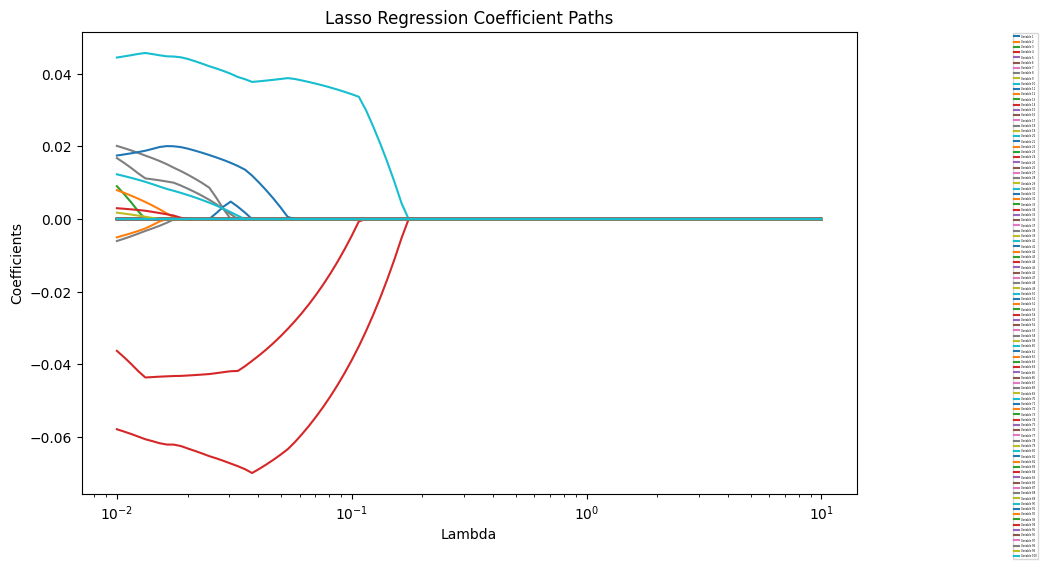

In [12]:
lambdas = np.exp(np.linspace(np.log(0.01), np.log(10), 100))
betasl = np.zeros((len(lambdas), X.shape[1]))
for i, lamb in enumerate(lambdas):
    lasso = Lasso(alpha = lamb)
    lasso.fit(X_standardized, Y_centered)
    betasl[i, :] = lasso.coef_

# Plot Lasso paths (log-scale)
plt.figure(figsize=(10, 6))
for j in range(X_standardized.shape[1]): #for each variable
    plt.plot(lambdas, betasl[:, j], label=f"Variable {j+1}")
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficient Paths")
plt.legend(fontsize=1.8, loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()

# Ridge

## Fit Model

In [ ]:
#insert

## Regularization Path

In [ ]:
#insert

# Elastic Net

## Fit Model

In [ ]:
# insert

## Regularization Path

In [ ]:
#insert